[Home](Home.ipynb)

# Example Study Sheet:  Sigma Notation

This student is grappling with Sigma notation i.e. notation that might be understood in terms of a computer language, with a looping construct.  Most languages have that, including Python.

In Jupyter Markdown, we can represent Sigma using $\LaTeX$:

$$
\sum\limits_{i=1}^n i^2 = \frac{n(n+1)(2n+1)}{6}
$$

The ```Sigma``` function below is meant to be very generic, meaning as long as the single variable, the index, is sufficient to drive the output of successive terms, we're free to provide the corresponding [callable object](Internals.ipynb).

For example, the expression ```lambda x: 1/x**2``` is callable and may be passed directly as the last argument to ```Sigma```.

Capitalizing the name of a Python function is a slight break with style conventions.  However, the allusion here is to the ```\Sigma``` in $\LaTeX$, i.e. to get the uppercase Greek sigma, we spell it with a capital S.  Otherwise we get $\sigma$ i.e. the lowercase Greek sigma.

In [1]:
def Sigma(start, stop, any_callable):
    total = 0
    for i in range(start, stop+1):
        total += any_callable(i) # running total
    return total

Sigma(1, 100, lambda x: 1/x**2) # sum 1/1 + 1/4 + 1/9 + 1/16... 1/100**2

1.6349839001848923

Python lets us fuel the very same expression with an entirely different number type, the Fraction, here renamed Q, a letter commonly reserved for "rational numbers" i.e. "ratios" -- the same as fractions really.

In [2]:
from fractions import Fraction as Q

In [3]:
the_sum = Sigma(1, 100, lambda x: Q(1, x**2))

In [4]:
the_sum

Fraction(1589508694133037873112297928517553859702383498543709859889432834803818131090369901, 972186144434381030589657976672623144161975583995746241782720354705517986165248000)

In [5]:
the_sum.numerator / the_sum.denominator  # same floating point answer

1.634983900184893

The next number type we might test (after floats and Fractions), is the Decimal, which will allow us many more digits of precision.  We get to control with how much precision.  Default is 28 decimal digits.

In [6]:
from decimal import Decimal
the_sum = Sigma(1, 10000, lambda x: 1/Decimal(x)**2)
the_sum

Decimal('1.644834071848059769806081814')

We don't have to use lambda expressions.  What's done to x, to compute the term, may be more than we can comfortably fit in a one-liner.

Now our student does more background research on this specific sequence.  Does it converge and, if yes, to what?

In [7]:
from IPython.display import YouTubeVideo

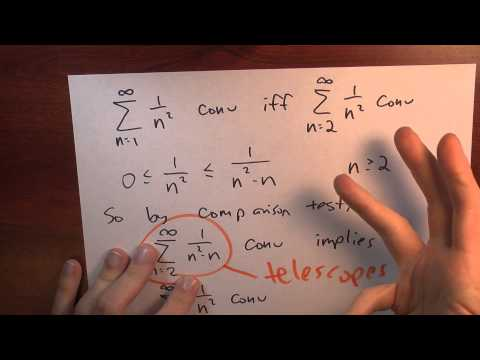

In [8]:
YouTubeVideo("9euTxoCC8Hk")

So, we have learned that:

$$
\sum\limits_{i=1}^\infty 1/i^2 = \pi^{2}/6
$$

Lets verify the identity we showcased up top:

$$
\sum\limits_{i=1}^n i^2 = \frac{n(n+1)(2n+1)}{6}
$$

In [9]:
def right_side(n):
    return n*(n+1)*(2*n + 1)//6

def left_side(n):
    return Sigma(1, n, lambda x: x**2)

In [10]:
right_side(100) == left_side(100)

True

In [11]:
right_side(1) == left_side(1)

True

In [12]:
right_side(12345) == left_side(12345)

True

$\Sigma$ is used for adding all the terms.  Suppose we want to multiply them all together instead, is there a Greek letter for that too?  You betcha.

$$
\prod\limits_{i=1}^n x = x!
$$

Since Σ is a codepoint in Unicode, might we use Σ for our Python function name?  Lets try:

In [13]:
Σ = Sigma  # make a synonym

In [14]:
Σ(1, 10, lambda x: x)

55

Wow, we can!

Sigma Notation is often used to express infinite sums, meaning there's no defined end to the number of terms, and "at the limit" i.e. as we approach infinity, we may converge to a very specific number.

A lot of mathematics, including high school mathematics, if focused on these finite and infinite sums.  Sigma Notation comes in handy.  However you may also wish to write some analogous Python.